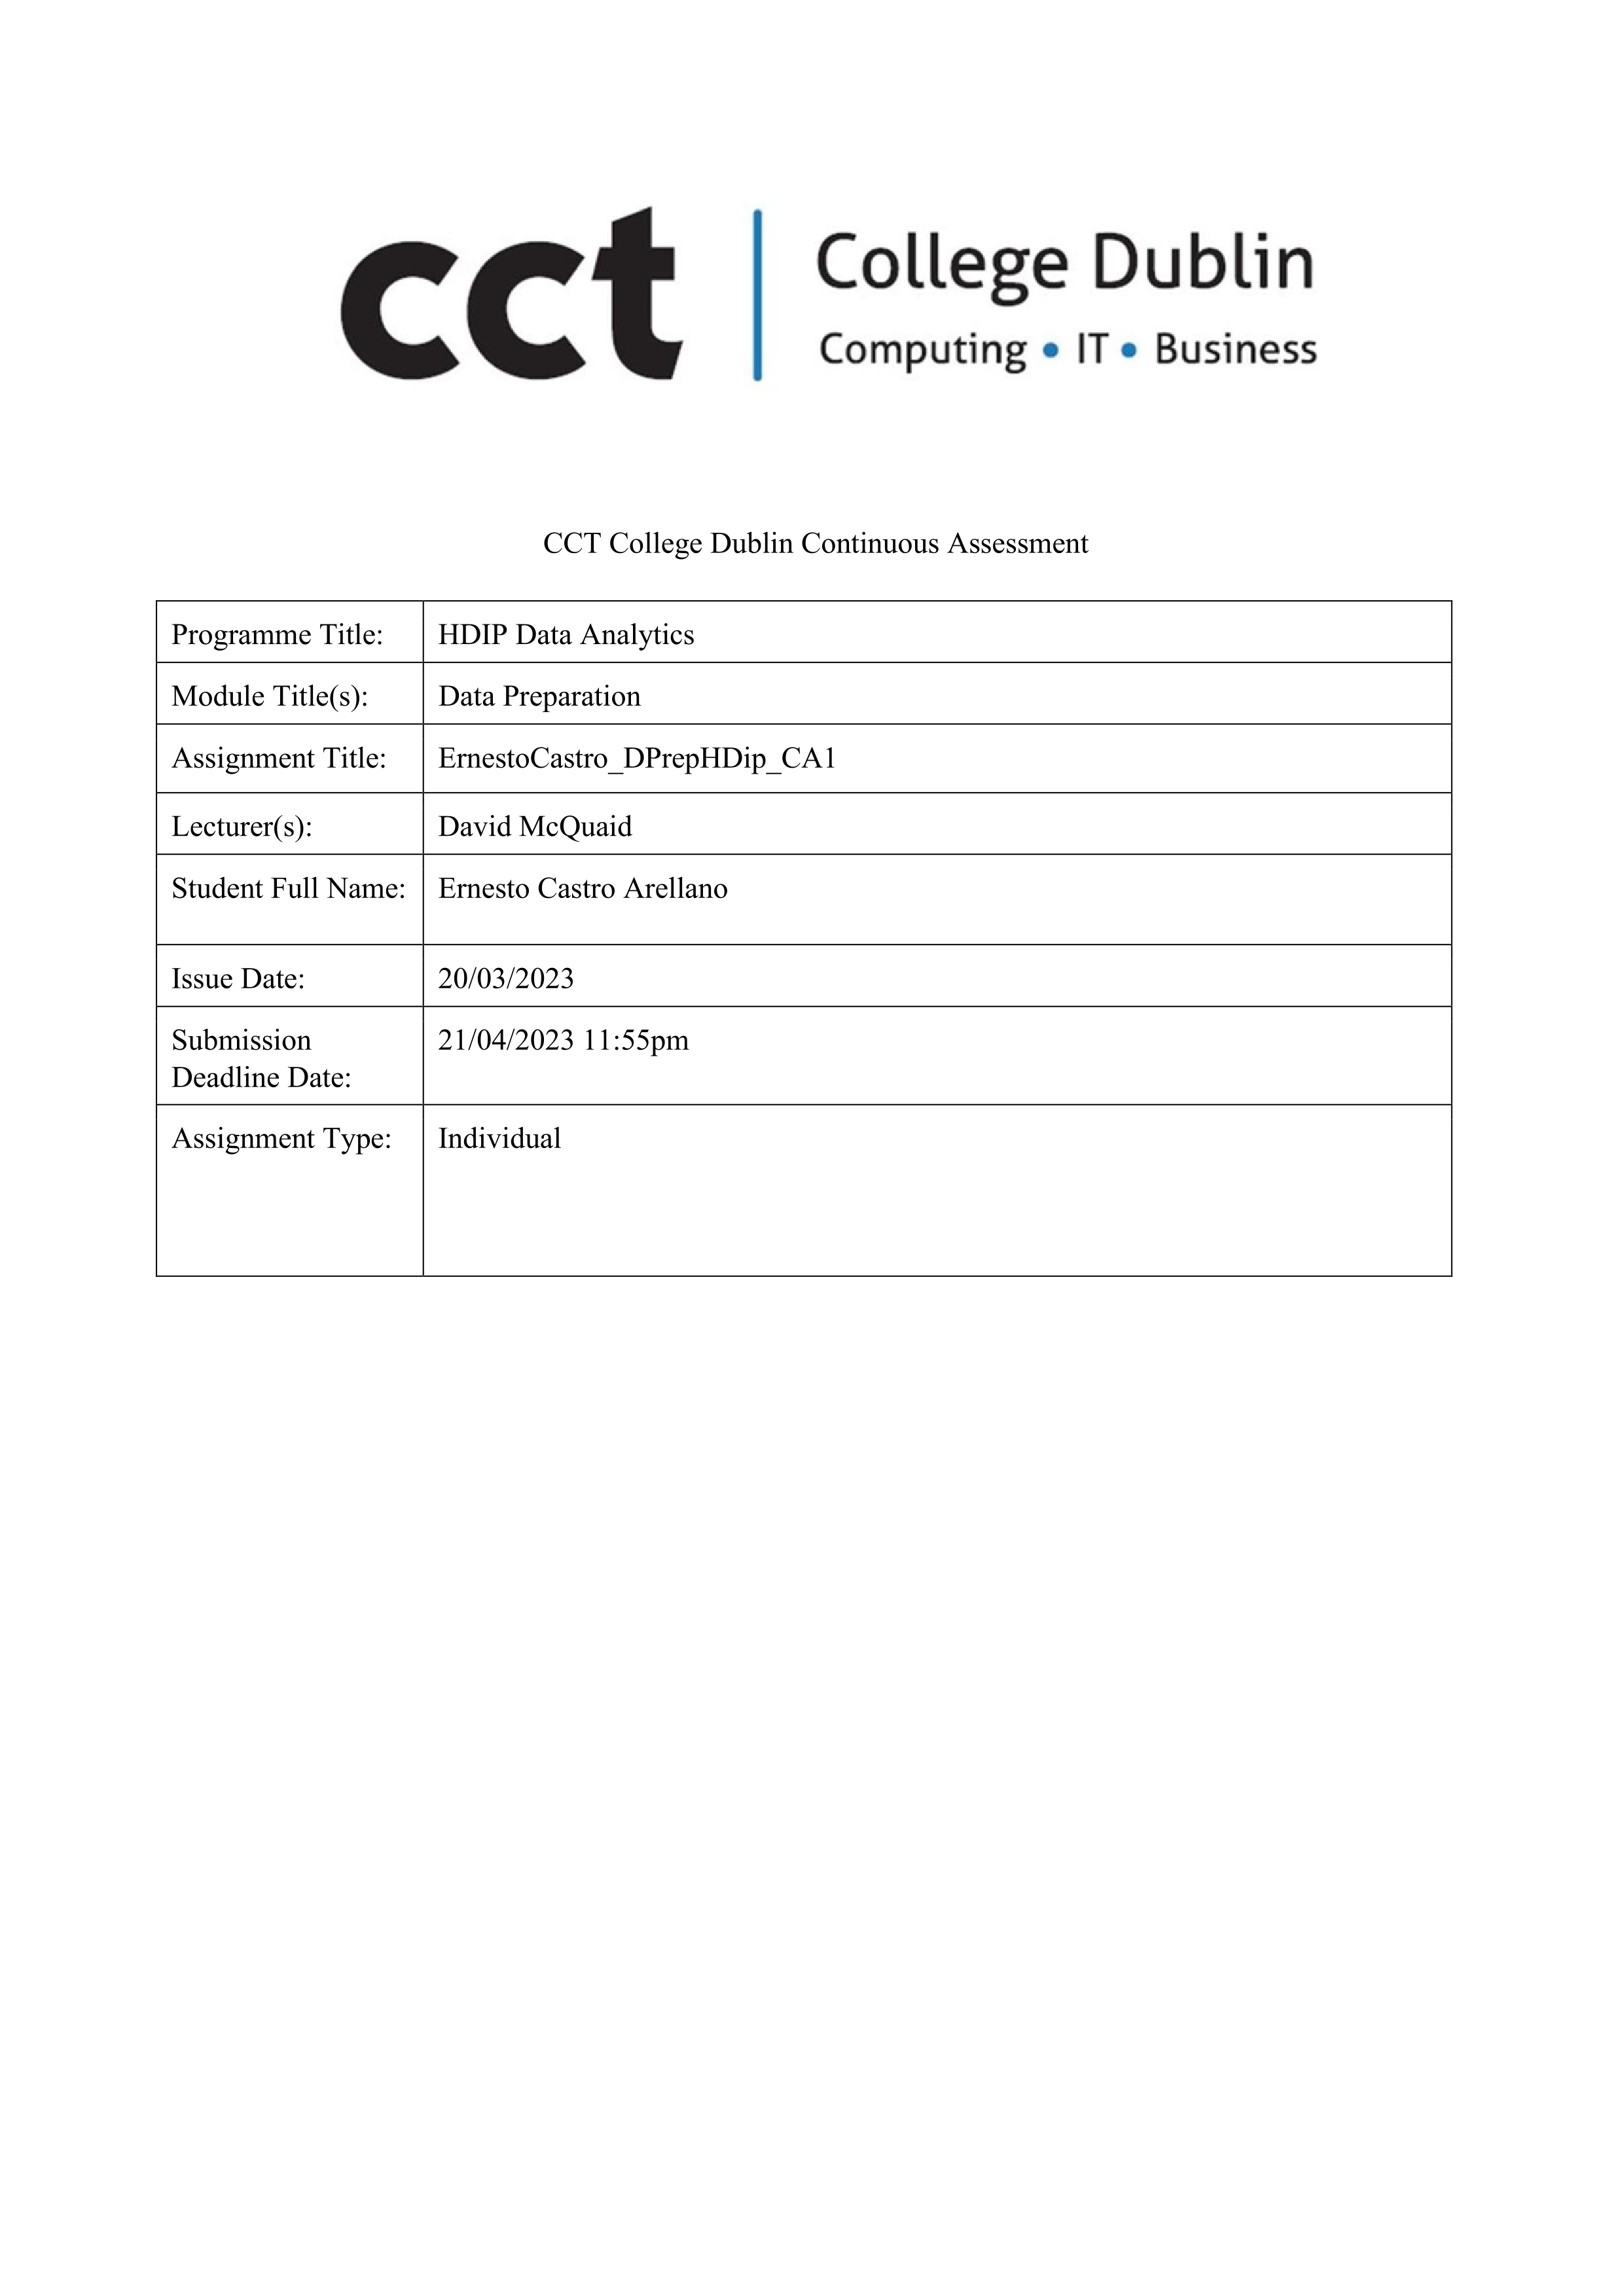

In [112]:
from IPython.display import Image
Image("HDip_DPrep_CA1_cover_sheet.png")

# Scenario: 

You have been retained by a haulage company to analyse a dataset based on data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates pressurised air that are utilized in various functions in a truck, such as braking and gear changes. 

  - **The Positive class consists of component failures for a specific component of the APS system.**


  - **The Negative class consists of trucks with failures for components not related to the APS.** 
  
The data consists  of a subset of all available data, selected by experts. This analysis will help determine the investment strategy for the company in the upcoming year.

All data wrangling, analysis, and visualizations must generated using python.

The companies CTO also requires you to rationalize all the decisions that you have made in your report.

**Requirements**

You are required to use the dataset contained within the file “aps_failure_set.csv”, conduct the following analysis and report on your findings:

Characterisation of the data set: size; number of attributes; has/does not have missing values, number of observations etc.

- Application of Data preparation/evaluation methods (Cleaning, renaming, etc) and EDA visualizations (plural), including a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it.
- Use PCA to establish the minimum number of features needed for retaining 99.5% variance in the data and then implement PCA to dimensionally reduce the data to the number of features that you have discovered. Include a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it.
- Explain in your own words what the “Curse of Dimensionality ” is.
- Conclusions, Findings of data set and references (HARVARD style).

Note that all written work MUST be completed in Jupyter Notebook Markdown (please review “Jupyter Notebook Tutorial” Notes in Moodle if you are unsure of this).

All Code must be included in code blocks (As normal). No other upload will be accepted.

All written work MUST be detailed in your Jupyter Markdown (NOT in code comments).

## Exploratory Data Analysis

We import all the libraries we require for our analysis, and we will continue to do so as we require more.

In [113]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [114]:
data_aps = pd.read_csv("aps_failure_set.csv")

In [115]:
data_aps.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

The first five rows are shown here, along with the 171 columns that make up our dataset.

Moreover, we may observe that the number of columns that comprise our data set includes object variables. Even thought some of them appear to be numerical.

In [116]:
data_aps.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [117]:
data_aps.shape

(60000, 171)

Using this function, we can obtain the descriptive statistics for our dataset. A list of all the dataset's column statistics is the result of this function. 
Finding outliers or missing data is made easier by having a thorough understanding of the data being worked on.
The following summary shows us the number of non-null values, the mean, the standard deviation, the minimum and maximum values, and the percentiles 25%, 50%, and 75% for this dataset. For this dataset, we will just study the numerical variables. Nonetheless as we notice, the only numerical column we have in our entire set of data is the one we'll be analyzing. 

- The table informs us that there are 60000 rows altogether.
- It gives us the mean value, which enables us to compare our data to other data sets and comprehend it in general. Outliers or extremes may, however, affect the mean in our data collection.
- It provides us with the standard deviation, a measure of dispersion that is used to describe the variability or spread of a data collection.
- It gives us the minimal number at which we can see that the "aaa_000" column already contains unusual values.
- The values of the 25th, 50th, and 75th percentiles, which are calculated using statistical methods that divide an ordered set of data into 100 equal parts, are clearly evident. These percentages represent the values of the data set and were determined to be 25%, 50%, and 75%.
- We have the maximum, which represents the highest value in our data. 

### Summary Statistics

In [118]:
data_aps.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


We'll use this code to set the maximum number of columns that will appear in the table's information, which in this case is 171 columns, and then print out details about the DataFrame where information about the DataFrame is displayed, including the type of object, the range of the index, the number of columns, the names of the first and last columns, the types of data stored in the columns, and the amount of memory the DataFrame uses. 

In [119]:
pd.options.display.max_info_columns = 171
data_aps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 171 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    class   60000 non-null  object
 1    aa_000  60000 non-null  int64 
 2    ab_000  60000 non-null  object
 3    ac_000  60000 non-null  object
 4    ad_000  60000 non-null  object
 5    ae_000  60000 non-null  object
 6    af_000  60000 non-null  object
 7    ag_000  60000 non-null  object
 8    ag_001  60000 non-null  object
 9    ag_002  60000 non-null  object
 10   ag_003  60000 non-null  object
 11   ag_004  60000 non-null  object
 12   ag_005  60000 non-null  object
 13   ag_006  60000 non-null  object
 14   ag_007  60000 non-null  object
 15   ag_008  60000 non-null  object
 16   ag_009  60000 non-null  object
 17   ah_000  60000 non-null  object
 18   ai_000  60000 non-null  object
 19   aj_000  60000 non-null  object
 20   ak_000  60000 non-null  object
 21   al_000  60000 non-null  object
 2

We will use this code to verify the number of null values that we have in our entire dataset. However, as we can see from the information that we got, it shows us that we don't have any null values. This is because the majority of our information continues as an object type, which is why it does not recognize our null values. Therefore we will proceed to replace all our data with no values such as 'n.a.', '?', 'NA', 'n/a', 'na', '--' in NaN values to start working on.

In [120]:
data_aps.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [121]:
data_aps.replace(['n.a.', '?', 'NA', 'n/a', 'na', '--'], np.nan, inplace = True)

Once the previous values for our data have been replaced, we can see how the code now displays the number of null values we have in each of our columns. Next, we will visualize the same values in percentage form to determine the percentage of null values in each column.

In [122]:
data_aps.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [123]:
data_aps.isnull().mean() * 100

class      0.000000
aa_000     0.000000
ab_000    77.215000
ac_000     5.558333
ad_000    24.768333
            ...    
ee_007     1.118333
ee_008     1.118333
ee_009     1.118333
ef_000     4.540000
eg_000     4.538333
Length: 171, dtype: float64

To determine which of our columns yields the greatest number of null values, we will first count the number of null values in each column and then order them in descending order. We will then represent the null values as a percentage.

In [124]:
null_counts = data_aps.isnull().sum().sort_values(ascending=False)
print(null_counts.head(15))

br_000    49264
bq_000    48722
bp_000    47740
bo_000    46333
ab_000    46329
cr_000    46329
bn_000    44009
bm_000    39549
bl_000    27277
bk_000    23034
ch_000    14861
co_000    14861
cg_000    14861
cf_000    14861
ad_000    14861
dtype: int64


In [125]:
null_counts_top10 = null_counts.head(15)
null_pct = (null_counts_top10 / len(data_aps)) * 100
print(null_pct)

br_000    82.106667
bq_000    81.203333
bp_000    79.566667
bo_000    77.221667
ab_000    77.215000
cr_000    77.215000
bn_000    73.348333
bm_000    65.915000
bl_000    45.461667
bk_000    38.390000
ch_000    24.768333
co_000    24.768333
cg_000    24.768333
cf_000    24.768333
ad_000    24.768333
dtype: float64


To visualize null values, a graph of bars will be created in which the first 50 columns with the greatest number of null values will only be chosen and represented. 

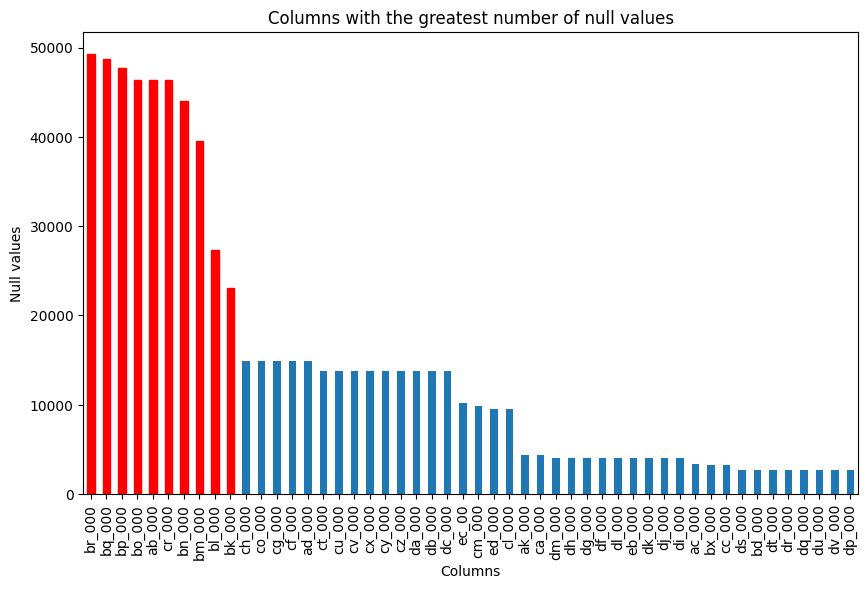

In [126]:
null_counts_top50 = null_counts.head(50)
ax = null_counts_top50.plot(kind='bar', figsize=(10,6))
for i in range(10):
    ax.get_children()[i].set_color('red')
plt.title('Columns with the greatest number of null values')
plt.xlabel('Columns')
plt.ylabel('Null values')
plt.show()

We will continue to remove columns with 50% or more null values and then reveal the shape to see whether they have been eliminated completely. 

In [127]:
data_aps = data_aps.drop(["br_000", "bq_000", "bp_000", "bo_000", "ab_000", "cr_000", "bn_000", "bm_000"], axis=1)

In [128]:
data_aps.shape

(60000, 163)

We will now analyze our **"class"** column, identifying it as being of the object type and containing the classifications "negative" and "positive." After counting the number of values present in each of them, we will proceed to replace them with numeric values and determine that the negative classifications will have a value of 0 and the positive classifications a value of 1. Additionally, we'll review our column using the **unique()** function once more, where we'll see that the type has changed from object to int64. To better understand the distribution of the same count, a histogram is plotted and we can see that only 16% of the values in "class" are positive, with approximately 84% of them being negative. 

In [129]:
data_aps['class'].unique()

array(['neg', 'pos'], dtype=object)

In [130]:
data_aps['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

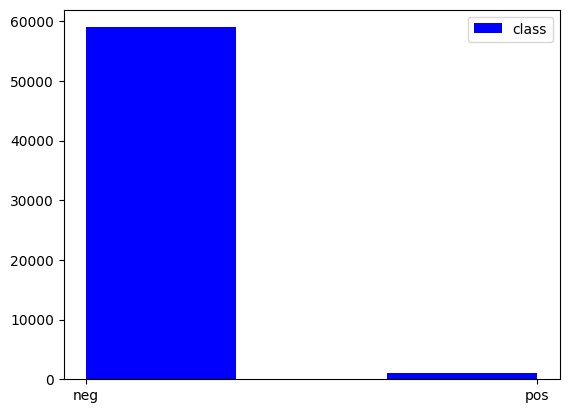

In [131]:
data_aps["class"].hist(grid = False, xlabelsize = 10, ylabelsize = 10, legend = "class", bins = 3, color='blue');

In [132]:
data_aps['class'].replace('neg', 0, inplace = True)
data_aps['class'].replace('pos', 1, inplace = True)

In [133]:
data_aps['class'].unique()

array([0, 1], dtype=int64)

To start working with our independent variables, let's first remove our variable target from our initial data using the following code and we'll get a new date called data_aps1.

In [134]:
data_aps1 = data_aps.drop(["class"],axis=1)
data_aps1.shape

(60000, 162)

With this code, we're transforming the type of data we have from object to float, and we'll observe that all columns contain an identical set of variables. Consequently, we'll use the code **describe()** to see the statistical data for every single one of the columns.

In [135]:
data_aps1 = data_aps1.astype(float)

In [136]:
data_aps1.dtypes

aa_000    float64
ac_000    float64
ad_000    float64
ae_000    float64
af_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 162, dtype: object

In [137]:
data_aps1.describe()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,4.370966e+05,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,2.374282e+06,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.080000e+02,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.672000e+03,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.952200e+04,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,2.288306e+08,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


## Imputation of missing vaues

In order to account for values that are NaN, we use a technique called data imputation, which involves replacing the missing values with ones that are estimated using data from the column. There are various imputative techniques, including the mean, the mode, the interpolation, and the average of the columnar value estimates, among others.
Since they don't contribute extreme or atypical values into the imput data and, as a result, don't significantly affect the distribution of the data, we use imputación by the median for this classification analysis.

#### Replacing NaNs using Mean of the columns

- Applying the code to obtain the mean in each column while continuing to impute the values for NaN yields a numerical result. Using this code, we can verify that this will return a list of columns with null values, indicating True for those columns that do and False for those that do not. We can also observe that we no longer have any null values because they have all been replaced.

In [138]:
mean_cnt = data_aps1.mean()
data_aps1 = data_aps1.fillna(mean_cnt)

In [139]:
data_aps1.isnull().any()

aa_000    False
ac_000    False
ad_000    False
ae_000    False
af_000    False
          ...  
ee_007    False
ee_008    False
ee_009    False
ef_000    False
eg_000    False
Length: 162, dtype: bool

### Database Normalization

The process of data normalization involves adjusting the values of a set of characteristics to a common scale. The normalization process is used to prevent characteristics with large numerical values from overpowering those with smaller values. Additionally, normalization can help standardize the data and make it easier to analyze the data.

There are several methods for normalizing data, some of which are normalization by Unit Vector Scaling, z-score, Robust scaling, and Min-Max scaling.

We will standardize the numerical to each column data using Z-score normalization. This is due to the possibility that some attributes in the data collection could be scaled differently, which could affect the effectiveness and accuracy of some automatic learning algorithms. When the data are standardized, each attribute is changed to have a median of zero and a standard deviation of one, allowing the data to be on the same scale and more similar to one another.

Additionally, we will display our data using the code describe(), and we can observe that our data has been normalized.

**Z-Score Normalization**

In [140]:
from sklearn.preprocessing import scale
numeric_cols = data_aps1.select_dtypes(include=['float64']).columns
data_aps1[numeric_cols] = scale(data_aps1[numeric_cols])

In [141]:
data_aps1.describe()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04
mean,9.473903e-18,-5.044853e-17,-1.953993e-18,-9.444297e-18,-1.415164e-17,5.921189e-19,-1.006602e-17,-1.604642e-17,1.450691e-18,1.314504e-17,...,-2.155313e-17,3.884300e-17,2.534269e-17,-3.244812e-17,2.125707e-17,1.373716e-17,-2.788880e-17,-3.712586e-17,-4.144833e-18,7.697546e-19
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-4.080105e-01,-4.608829e-01,-5.439332e-03,-4.312065e-02,-5.359411e-02,-1.088402e-02,-2.869057e-02,-5.757384e-02,-1.169594e-01,-1.851360e-01,...,-3.877025e-01,-3.907812e-01,-3.836739e-01,-3.533946e-01,-3.132733e-01,-2.015137e-01,-3.103678e-01,-1.777167e-01,-2.122036e-02,-2.465914e-02
25%,-4.022758e-01,-4.608829e-01,-5.438134e-03,-4.312065e-02,-5.359411e-02,-1.088402e-02,-2.869057e-02,-5.757384e-02,-1.169594e-01,-1.850013e-01,...,-3.850624e-01,-3.885527e-01,-3.812220e-01,-3.499507e-01,-3.127466e-01,-2.014450e-01,-3.103678e-01,-1.777167e-01,-2.122036e-02,-2.465914e-02
50%,-1.963881e-01,-4.608827e-01,-5.431114e-03,-4.312065e-02,-5.359411e-02,-1.088402e-02,-2.869057e-02,-5.757384e-02,-1.169594e-01,-1.834922e-01,...,-1.790720e-01,-1.781958e-01,-1.871416e-01,-1.775164e-01,-2.194338e-01,-1.761481e-01,-3.003586e-01,-1.777167e-01,-2.122036e-02,-2.465914e-02
75%,-7.335890e-02,-4.608807e-01,-5.198884e-03,-4.312065e-02,-5.359411e-02,-1.088402e-02,-2.869057e-02,-5.757384e-02,-1.169594e-01,-1.624269e-01,...,-4.863089e-17,9.842441e-03,1.440168e-02,5.700658e-03,-4.675961e-02,-1.007052e-01,-5.038748e-17,-1.275937e-01,-2.122036e-02,-2.465914e-02
max,1.847795e+01,2.297451e+00,2.449463e+02,1.330662e+02,9.767074e+01,1.658201e+02,1.208051e+02,7.054055e+01,8.358729e+01,9.673802e+01,...,6.743692e+01,6.949752e+01,8.324200e+01,5.116963e+01,2.941691e+01,6.938850e+01,4.279481e+01,8.053769e+01,1.128992e+02,1.328009e+02


### Introducing Principal Component Analysis (PCA)

The Principal Componen Analysis PCA is used to reduce the dimensionality of our dataset to the minimum number of features as possible while maintaining the maximum variety.

For this case we will use the scaler to maintain 99.5% of the variance and we will fit the dataset without the column **class** in the scaler.The graphic below demonstrates that 118 components are required to produce the aforementioned deviation.


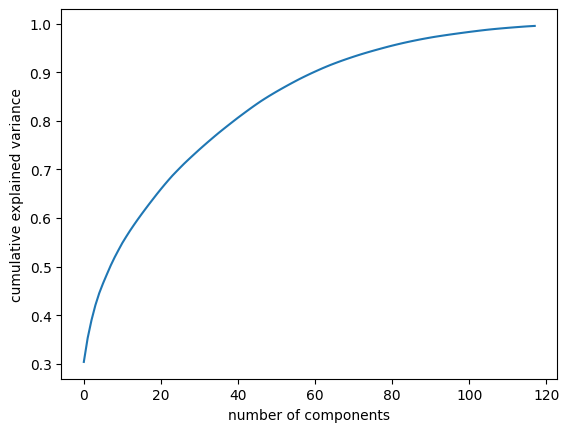

In [142]:
from sklearn.decomposition import PCA
pca = PCA(0.995).fit(data_aps1) 

plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

In [143]:
pca = PCA(0.995)
projected = pca.fit_transform(data_aps1)

In [144]:
projected.shape

(60000, 118)

We will rename the 118 columns and converting the new dataset and add the column **class** back and projecting it 


In [145]:
column_names = ['C' + str(i+1) for i in range(projected.shape[1])]
df_pca = pd.DataFrame(projected, columns=column_names)

In [146]:
df_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C109,C110,C111,C112,C113,C114,C115,C116,C117,C118
0,2.349979,-1.306859,1.700177,-0.111721,0.779315,-0.484585,-0.000751,-0.211112,-1.278994,-0.709702,...,0.165497,0.433770,0.500020,0.094144,-0.185112,-0.331892,-0.246027,-0.132436,0.025352,-0.179623
1,-0.613947,-0.480794,0.081552,-0.047556,0.039516,-0.146038,-0.000192,0.061298,0.186987,-0.076795,...,-0.156060,0.174741,-0.342532,-0.134650,0.391511,-0.528838,-0.739425,-0.114580,-0.012312,0.073862
2,-1.261870,-0.140122,-0.240580,-0.194431,0.275061,0.011736,-0.018327,-0.155895,0.017600,0.327848,...,-0.062819,-0.060578,0.050887,-0.004711,-0.014213,0.099246,-0.019400,-0.016009,-0.013086,0.001464
3,-3.263691,0.240072,-0.781257,0.284918,-0.233897,0.320820,-0.022796,0.556362,1.066998,0.685221,...,0.063275,0.048295,-0.036016,0.004755,0.009868,-0.022966,0.003160,-0.001509,-0.026816,0.020148
4,0.272242,-0.164031,0.793916,-0.622800,0.280252,-0.158572,0.006521,-0.448050,-1.091739,-0.607924,...,0.048532,-0.192338,-0.186316,-0.015284,0.157980,-0.083826,-0.180642,-0.018177,-0.098939,0.008164


In [147]:
df_pca["class"] = data_aps["class"]

In [148]:
df_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C110,C111,C112,C113,C114,C115,C116,C117,C118,class
0,2.349979,-1.306859,1.700177,-0.111721,0.779315,-0.484585,-0.000751,-0.211112,-1.278994,-0.709702,...,0.433770,0.500020,0.094144,-0.185112,-0.331892,-0.246027,-0.132436,0.025352,-0.179623,0
1,-0.613947,-0.480794,0.081552,-0.047556,0.039516,-0.146038,-0.000192,0.061298,0.186987,-0.076795,...,0.174741,-0.342532,-0.134650,0.391511,-0.528838,-0.739425,-0.114580,-0.012312,0.073862,0
2,-1.261870,-0.140122,-0.240580,-0.194431,0.275061,0.011736,-0.018327,-0.155895,0.017600,0.327848,...,-0.060578,0.050887,-0.004711,-0.014213,0.099246,-0.019400,-0.016009,-0.013086,0.001464,0
3,-3.263691,0.240072,-0.781257,0.284918,-0.233897,0.320820,-0.022796,0.556362,1.066998,0.685221,...,0.048295,-0.036016,0.004755,0.009868,-0.022966,0.003160,-0.001509,-0.026816,0.020148,0
4,0.272242,-0.164031,0.793916,-0.622800,0.280252,-0.158572,0.006521,-0.448050,-1.091739,-0.607924,...,-0.192338,-0.186316,-0.015284,0.157980,-0.083826,-0.180642,-0.018177,-0.098939,0.008164,0


In [149]:
data_aps_array = df_pca.values

### Definition of the model according to our data

We add the programs to test and train our models, determine which one has the highest accuracy, and start making predictions using that model. The findings indicate that the Logistic Regression provided the best accuracy, thus we will proceed to apply the model and analyze our outcomes.

In [41]:
from sklearn.model_selection import train_test_split
X = data_aps_array[:,0:118]
y = data_aps_array[:,118]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.25, random_state=123)

In [42]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [43]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [44]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.990044 (0.001362)
LDA: 0.989378 (0.001911)
KNN: 0.989511 (0.001287)
CART: 0.984378 (0.001269)
NB: 0.963600 (0.003003)
SVM: 0.985978 (0.000403)


In [50]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
predictions = model.predict(X_validation)

### Final Results 

Appliying our Logistic Regression model we have found that the Accuracy Score shows that 99.11% of the observations were correctly classified. In other words, the model's accuracy rate is very high, indicating that it is a good model.

 - The Classification Report gives us additional information about the model's performance in each class. 
 - The model's precision (precision) for classes 0 and 1 is 0.99 and 0.78, respectively.
 - The model's recall for classes 0 and 1 is 1.00 and 0.64, respectively.
 - The F1 score combines recall and precision into a single metric, and as a result, the model has an F1-score of 1.00 for class 0 and 0.70 for class 1, respectively.
 
 - The confusion matrix displays the number of accurate and inaccurate predictions the model made for each class. In this instance, the model correctly classified 14709 observations of class 0 and 158 observations of class 1, but incorrectly classified 44 observations of class 0 and 89 observations of class 0.
 
    False Positive (FP) are observations that were classified as positive (class 1) but are actually negative (class 0) thus, the model incorrectly classified 89 observations of class 0 as positive (FP).

    False Negative (FN) are observations that were classified as negative (class 0) but are actually positive (class 1) thus, the model incorrectly classified 44 observations from class 1 as negatives (FN).

    True Positives (TP) are observations that were classified as positive (class 1) but are actually positive (class 1) thus, the model correctly classified 158 observations from class 1 as positive (TP).

    True Negatives (TN) are observations that were classified as negative (class 0) but are actually negative (class 0) thus, the model correctly classified 14709 observations of class 0 as negatives (TN).

Accuracy Score:  0.9911333333333333

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     14753
         1.0       0.78      0.64      0.70       247

    accuracy                           0.99     15000
   macro avg       0.89      0.82      0.85     15000
weighted avg       0.99      0.99      0.99     15000


Confusion Matrix: 
 [[14709    44]
 [   89   158]]


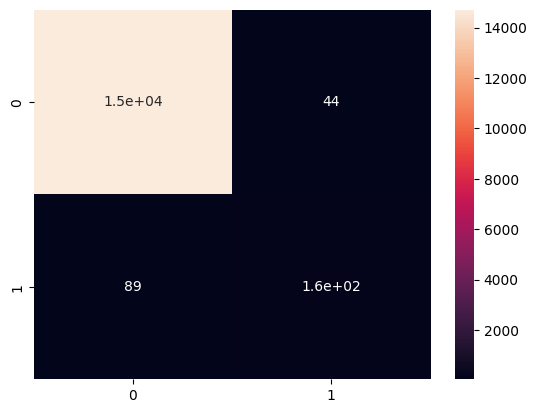

In [54]:
print("Accuracy Score: ", accuracy_score(y_validation, predictions))
print("\nClassification Report: "'\n', classification_report(y_validation, predictions))
cm = confusion_matrix(y_validation, predictions)
sns.heatmap(cm, annot = True)
print("\nConfusion Matrix: "'\n', confusion_matrix(y_validation, predictions))

### Conclusions 

In conclusion it is clear that after cleaning the dataset using several techniques and resources and applying the dimensionality reduction using PCA in order to provide a better analisys our data just suffered a reduction of 31%,  resized to 118 features which it is still a considerable large data from its original size 171.

According to the regression logarithmic model's results, we can say that the model has a high level of precision in classifying observations into the negative category (99% precision) and a reasonable level of precision in classifying observations into the positive category (78% precision). 

Overall then the model's results are excellent, although based on the information we have and the precision in both classes, we can conclude that our model is capable of accurately classifying the majority of truck-related failures (the negative class); however, this implies that there are APS component failures (the positive class) that have not yet been accurately identified by the model and therefore there is an opportunity for improvement in the classification of positive observational data. In order to improve the effectiveness and safety of the trucks, it is advised that the company adjust the model by adding more data that is pertinent to the detection of APS component failures and, as a result, take preventative measures to avoid APS failures in the trucks.




### References 

www.w3schools.com. (n.d.). Python Machine Learning Linear Regression. [online] Available at: https://www.w3schools.com/python/python_ml_linear_regression.asp.

pandas.pydata.org. (n.d.). pandas.isnull — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.isnull.html.

www.w3schools.com. (n.d.). Python Machine Learning Train/Test. [online] Available at: https://www.w3schools.com/python/python_ml_train_test.asp.

www.tutorialspoint.com. (n.d.). Seaborn - Statistical Estimation. [online] Available at: https://m.tutorialspoint.com/seaborn/seaborn_statistical_estimation.htm [Accessed 21 Apr. 2023].

Scikit-learn.org. (2019). sklearn.metrics.confusion_matrix — scikit-learn 0.21.3 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html.

Stack Overflow. (n.d.). Z-score normalization in pandas DataFrame (python). [online] Available at: https://stackoverflow.com/questions/59668597/z-score-normalization-in-pandas-dataframe-python [Accessed 21 Apr. 2023].



### Curse of Dimensionality

The challenges a machine learning system encounters when working with data in higher dimensions, which did not exist in lower dimensions, are essentially what is meant by the term "curse os dimensionality". This occurs because the minimal data needs also rise significantly as you add features. This means that to ensure tat all possible feature value combinations are fairly represented in our sample, you need an exponentially expanding number of samples (rows) as the number of features (columns) increases.
